In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
csv_file = 'Nat_Gas.csv'

In [19]:
df = pd.read_csv(csv_file)

In [20]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')

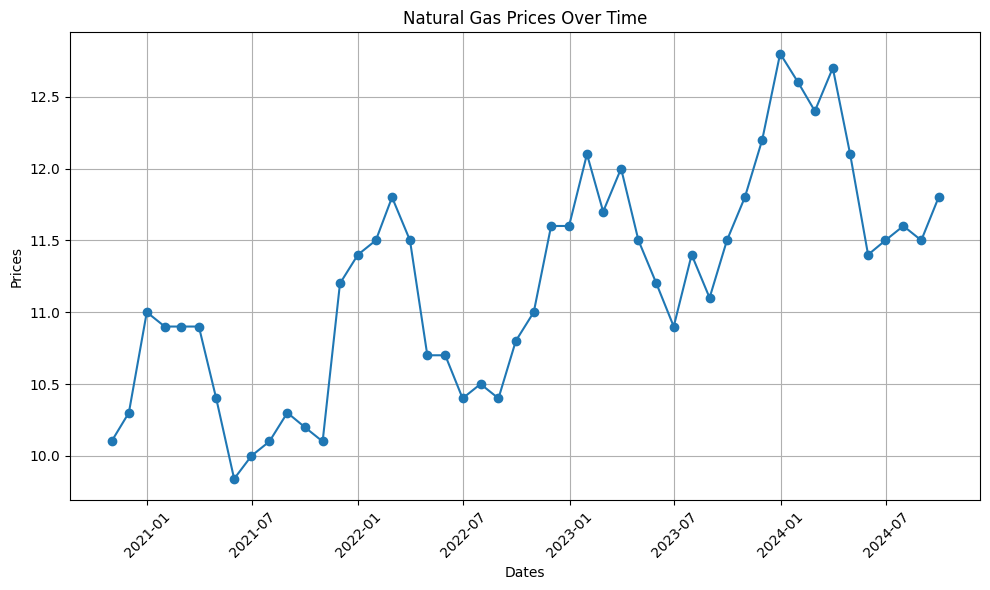

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(df['Dates'], df['Prices'], marker='o', linestyle='-')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
import numpy as np
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

def extrapolate_one_year(df):
    df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
    df = df.sort_values('Dates')

    X = df['Dates'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
    y = df['Prices'].values

    model = LinearRegression()
    model.fit(X, y)

    last_date = df['Dates'].max()
    future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=365)

    X_future = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
    y_future = model.predict(X_future)

    df_future = pd.DataFrame({'Dates': future_dates, 'Prices': y_future})

    df_extended = pd.concat([df, df_future], ignore_index=True)

    return df_extended

In [23]:
def extrapolate_one_year_sine(df):
    df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
    df = df.sort_values('Dates')

    x = (df['Dates'] - df['Dates'].min()).dt.days.values
    y = df['Prices'].values

    def sin_model(t, A, omega, phi, B, C):
        return A * np.sin(omega * t + phi) + B * t + C

    guess = [
        (np.max(y) - np.min(y)) / 2,
        2 * np.pi / 365,
        0,
        0,
        np.mean(y)
    ]


    params, _ = curve_fit(sin_model, x, y, p0=guess)

    total_days = x[-1] + 365
    all_days = np.arange(0, total_days + 1)
    all_dates = df['Dates'].min() + pd.to_timedelta(all_days, unit='D')
    all_prices = sin_model(all_days, *params)

    df_extended = pd.DataFrame({'Dates': all_dates, 'Prices': all_prices})

    return df_extended

In [24]:
extended_df = extrapolate_one_year(df)

In [25]:
extended_df_sin = extrapolate_one_year_sine(df)

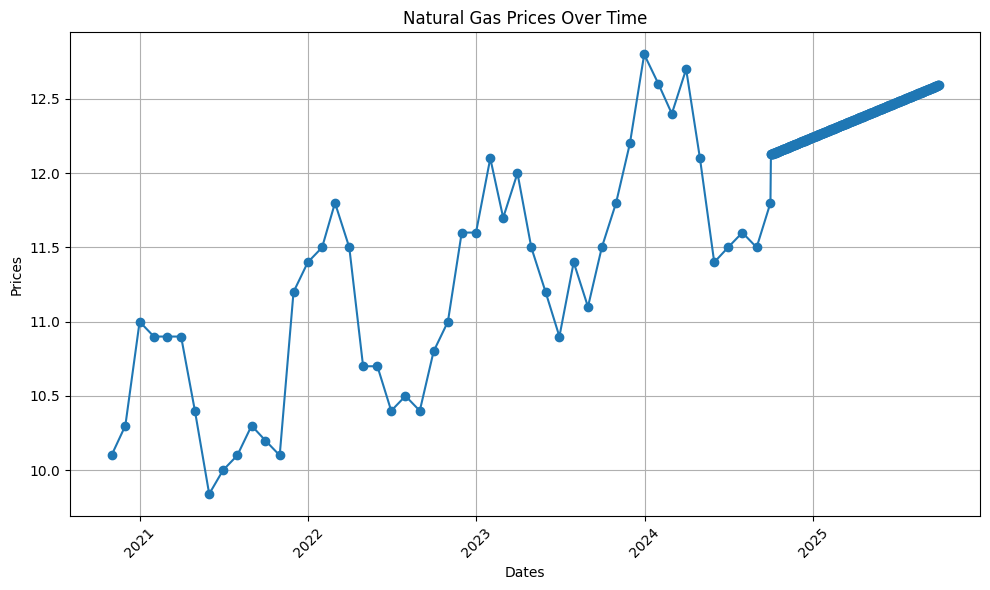

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(extended_df['Dates'], extended_df['Prices'], marker='o', linestyle='-')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

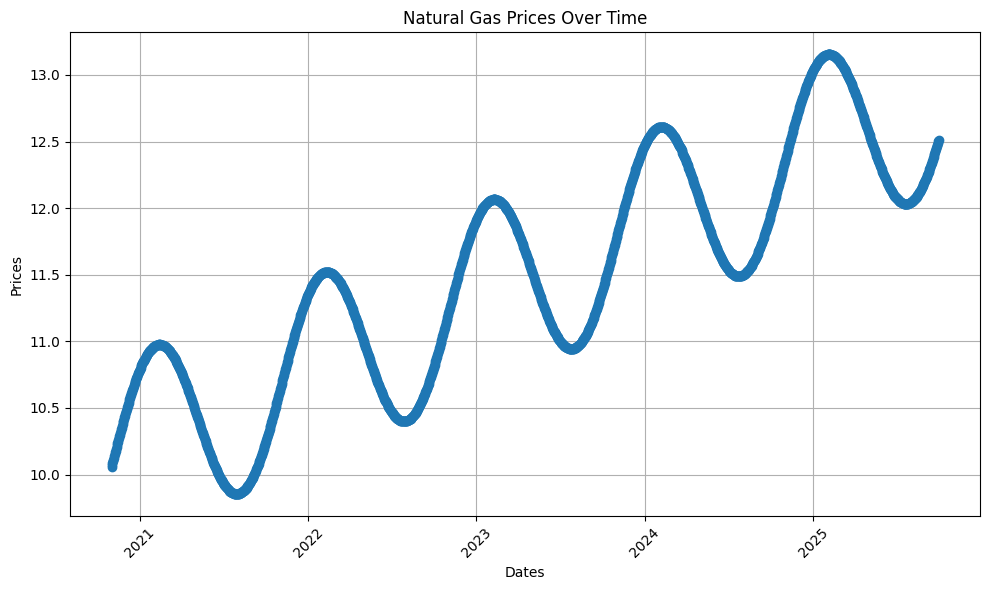

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(extended_df_sin['Dates'], extended_df_sin['Prices'], marker='o', linestyle='-')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

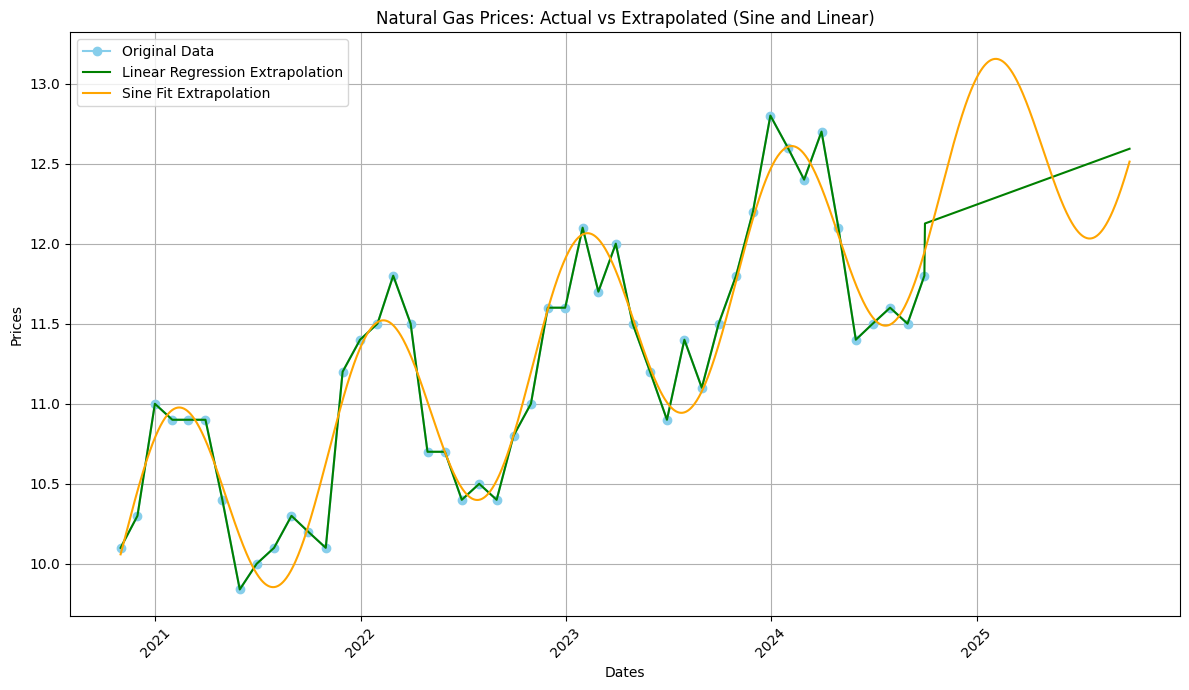

In [28]:
plt.figure(figsize=(12, 7))
plt.plot(df['Dates'], df['Prices'], 'o-', color='skyblue', label='Original Data')
plt.plot(extended_df['Dates'], extended_df['Prices'], '-', color='green', label='Linear Regression Extrapolation')
plt.plot(extended_df_sin['Dates'], extended_df_sin['Prices'], '-', color='orange', label='Sine Fit Extrapolation')
plt.title('Natural Gas Prices: Actual vs Extrapolated (Sine and Linear)')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
extended_df.to_csv('projected_prices.csv', index=False)